In [146]:
pip install pandas numpy matplotlib seaborn jupyter scikit-learn pdfplumber imbalanced-learn

Python(2778) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# County Gen Dataset

In [332]:
print('hi')

hi


In [336]:
# open pdf
with pdfplumber.open("UtilRenGenTotCnty2024.pdf") as pdf:
    page = pdf.pages[1]
    lines = page.extract_text().split("\n")

rows = []
for line in lines:
    # skip empty or non-data lines
    if not line.strip():
        continue

    # split into tokens
    parts = line.split()

    # find where numbers or dashes start (first numeric token or '-')
    for i, token in enumerate(parts):
        if re.match(r"^[-\d,]+$", token):  # a number or dash
            split_index = i
            break
    else:
        continue  # skip if no numeric data found

    # everything before that is the county name
    county = " ".join(parts[:split_index])
    numbers = parts[split_index:]

    # combine back into a single row
    rows.append([county] + numbers)

# Convert to DataFrame
df = pd.DataFrame(rows)

# Optional: clean up and replace dashes/commas
df = df.replace("-", '0').replace(",", "", regex=True)

# list of column names
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Apply the new column names
df_new = pd.DataFrame(columns=new_columns)

df_new['County'] = df[0]
df_new['Biomass'] = df[1]
df_new['Geothermal'] = df[2]
df_new['Small Hydro'] = df[3]
df_new['Solar Photovoltaic'] = df[4]
df_new['Solar Thermal'] = df[5]
df_new['Wind'] = df[6]
df_new['Total'] = df[7]

# drop 1st row
df_new = df_new.drop(0)

#rename df
county_gen = df_new.copy()
county_gen.head()


,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
1,Alameda,114841,0,0,28649,0,806969,950459
2,Alpine,0,0,0,0,0,0,0
3,Amador,0,0,81851,1971,0,0,83822
4,Butte,16031,0,214115,14653,0,0,244799
5,Calaveras,0,0,217624,2838,0,0,220462


In [337]:
# Combine "Small Hydro", "Solar Photovoltaic", and "Solar Thermal"
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Apply the new column names
df_new = pd.DataFrame(columns=new_columns)

df_new['County'] = df[0]
df_new['Biomass'] = df[1]
df_new['Geothermal'] = df[2]
df_new['Small Hydro'] = df[3]
df_new['Solar Photovoltaic'] = df[4]
df_new['Solar Thermal'] = df[5]
df_new['Wind'] = df[6]
df_new['Total'] = df[7]

for col in df_new.columns[1:]:
    df_new[col] = df_new[col].astype('Int64')

df_new

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Renewable Electrical Generation in Megawatt Ho...,2024,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Alameda,114841,0,0,28649,0,806969,950459
2,Alpine,0,0,0,0,0,0,0
3,Amador,0,0,81851,1971,0,0,83822
4,Butte,16031,0,214115,14653,0,0,244799
5,Calaveras,0,0,217624,2838,0,0,220462
6,Colusa,91830,0,0,0,0,0,91830
7,Contra Costa,28693,0,0,68857,0,81325,178875
8,Del Norte,0,0,0,0,0,0,0
9,El Dorado,0,0,252293,0,0,0,252293


In [338]:
county_gen = df_new.copy()
county_gen.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
0,Renewable Electrical Generation in Megawatt Ho...,2024,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,Alameda,114841,0,0,28649,0,806969,950459
2,Alpine,0,0,0,0,0,0,0
3,Amador,0,0,81851,1971,0,0,83822
4,Butte,16031,0,214115,14653,0,0,244799


# County Cap Dataset

In [339]:
import pdfplumber
import pandas as pd
import re

with pdfplumber.open("UtilRenCapTotCnty2024.pdf") as pdf:
    page = pdf.pages[0]
    lines = page.extract_text().split("\n")

rows = []
for line in lines:
    # skip empty or non-data lines
    if not line.strip():
        continue

    # split into tokens
    parts = line.split()

    # find where numbers or dashes start (first numeric token or '-')
    for i, token in enumerate(parts):
        if re.match(r"^[-\d,]+$", token):  # a number or dash
            split_index = i
            break
    else:
        continue  # skip if no numeric data found

    # everything before that is the county name
    county = " ".join(parts[:split_index])
    numbers = parts[split_index:]

    # combine back into a single row
    rows.append([county] + numbers)

# Convert to DataFrame
cap = pd.DataFrame(rows)

# Optional: clean up and replace dashes/commas
cap = cap.replace("-", "0").replace(",", "", regex=True)
cap = cap[1:]
cap.head()


,0,1,2,3,4,5,6,7,8,9,10,11
1,,35379,MW,None,None,None,None,None,None,None,None,None
2,5.546,0,9248,MW,None,None,None,None,None,None,None,None
3,,2452,0,5545,MW,None,None,None,None,None,None,None
4,,969,0,2451,MW,Orange,None,None,None,None,None,None
5,,236,0,968,MW,None,None,None,None,None,None,None


In [340]:
# Combine "Small Hydro", "Solar Photovoltaic", and "Solar Thermal"
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Apply the new column names
df_new2 = pd.DataFrame(columns=new_columns)

df_new2['County'] = cap[0]
df_new2['Biomass'] = cap[1]
df_new2['Geothermal'] = cap[2]
df_new2['Small Hydro'] = cap[3]
df_new2['Solar Photovoltaic'] = cap[4]
df_new2['Solar Thermal'] = cap[5]
df_new2['Wind'] = cap[6]
df_new2['Total'] = cap[7]


df_new2.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
1,,35379,MW,None,None,None,None,None
2,5.546,0,9248,MW,None,None,None,None
3,,2452,0,5545,MW,None,None,None
4,,969,0,2451,MW,Orange,None,None
5,,236,0,968,MW,None,None,None


In [341]:
county_cap = df_new2.copy()
county_cap.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
1,,35379,MW,None,None,None,None,None
2,5.546,0,9248,MW,None,None,None,None
3,,2452,0,5545,MW,None,None,None
4,,969,0,2451,MW,Orange,None,None
5,,236,0,968,MW,None,None,None


In [342]:
import pandas as pd

# Use the data directly from your PDF document
data = {
    'County': ['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'],
    'Biomass': [22, 0, 2, 0, 32, 7, 0, 56, 0, 61, 0, 0, 124, 3, 0, 36, 219, 40, 4, 0, 0, 13, 0, 9, 0, 0, 80, 52, 35, 56, 15, 0, 3, 25, 2, 59, 2, 11, 3, 3, 5, 144, 0, 13, 10, 12, 24, 0, 0, 0, 16, 37, 2, 31, 3],
    'Geothermal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 723, 302, 0, 0, 367, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1238, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Small Hydro': [0, 14, 68, 32, 0, 0, 70, 37, 5, 1, 93, 157, 64, 0, 6, 30, 214, 68, 0, 9, 13, 31, 21, 0, 0, 82, 12, 92, 28, 50, 14, 0, 38, 12, 0, 11, 4, 0, 0, 0, 0, 87, 14, 45, 0, 3, 21, 0, 21, 14, 38, 195, 3, 12, 2],
    'Solar PV': [18, 2, 11, 2, 0, 48, 0, 1571, 2, 2, 2225, 2, 5484, 1726, 3, 3, 1531, 84, 3, 0, 7, 353, 0, 140, 2, 0, 27, 6, 0, 4514, 316, 146, 1670, 206, 14, 34, 962, 0, 67, 31, 3, 8, 0, 0, 36, 15, 301, 3, 17, 0, 708, 5, 4, 17, 1],
    'Solar Thermal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250, 0, 0, 734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Wind': [286, 0, 0, 0, 0, 38, 0, 0, 0, 0, 265, 0, 3569, 0, 0, 0, 2, 0, 0, 0, 0, 18, 0, 15, 0, 0, 0, 0, 0, 676, 0, 0, 7, 182, 0, 4, 0, 0, 95, 0, 0, 101, 0, 0, 1099, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    'Total': [325, 16, 81, 33, 32, 92, 70, 1663, 7, 65, 3306, 461, 9241, 1729, 376, 68, 1966, 192, 7, 9, 20, 415, 106, 164, 2, 82, 119, 149, 63, 5545, 344, 146, 2451, 425, 17, 107, 968, 11, 165, 35, 8, 340, 14, 59, 1144, 1268, 346, 3, 40, 14, 762, 236, 9, 61, 6]
}

county_cap = pd.DataFrame(data)
county_cap.head()

,County,Biomass,Geothermal,Small Hydro,Solar PV,Solar Thermal,Wind,Total
0,Alameda,22,0,0,18,0,286,325
1,Amador,0,0,14,2,0,0,16
2,Butte,2,0,68,11,0,0,81
3,Calaveras,0,0,32,2,0,0,33
4,Colusa,32,0,0,0,0,0,32


In [343]:
hours_in_year = 8760  # 24*365

energy_cols = ['Biomass', 'Geothermal', 'Small Hydro', 
               'Solar PV', 'Solar Thermal', 'Wind', 'Total']

for col in energy_cols:
    county_cap[energy_cols] = county_cap[energy_cols].astype('Int64')
    county_cap[col + '_MWh'] = county_cap[col] * hours_in_year   # MW → GWh/year

county_cap = county_cap.drop(columns=energy_cols)
county_cap.head()


,County,Biomass_MWh,Geothermal_MWh,Small Hydro_MWh,Solar PV_MWh,Solar Thermal_MWh,Wind_MWh,Total_MWh
0,Alameda,192720,0,0,157680,0,2505360,2847000
1,Amador,0,0,122640,17520,0,0,140160
2,Butte,17520,0,595680,96360,0,0,709560
3,Calaveras,0,0,280320,17520,0,0,289080
4,Colusa,280320,0,0,0,0,0,280320


# Merging Datasets

In [344]:
def converter(df):
    cols_to_convert = df.columns[df.columns != "County"]

    df[cols_to_convert] = df[cols_to_convert].apply(lambda x: pd.to_numeric(x, errors="coerce"))
    df[cols_to_convert] = df[cols_to_convert].astype(int)
    return df

converter(county_cap)
converter(county_gen)

ValueError: cannot convert NA to integer

In [345]:
queue_data = pd.read_csv('queue_data.csv', header=1)
queue_data['q_date'] = pd.to_datetime(queue_data['q_date'], origin='1899-12-30', unit='D')
queue_data['prop_date'] = pd.to_datetime(queue_data['prop_date'], origin='1899-12-30', unit='D')
queue_data['on_date'] = pd.to_datetime(queue_data['on_date'], origin='1899-12-30', unit='D')
queue_data['wd_date'] = pd.to_datetime(queue_data['wd_date'], origin='1899-12-30', unit='D')
queue_data['ia_date'] = pd.to_datetime(queue_data['ia_date'], origin='1899-12-30', unit='D')
ca_queue_data = queue_data[queue_data['state']=='CA'].reset_index()
ca_queue_data['q_month'] = ca_queue_data['q_date'].dt.month
ca_queue_data['q_day'] = ca_queue_data['q_date'].dt.day
ca_queue_data['q_dayofweek'] = ca_queue_data['q_date'].dt.dayofweek   # Monday=0, Sunday=6
ca_queue_data.drop(columns=['q_date', 'prop_date', 'prop_year', 'IA_status_raw']) #don't need predicted dates, or date in dt format

,index,q_id,q_status,on_date,wd_date,ia_date,IA_status_clean,county,state,county_state_pairs,...,type2,type3,mw1,mw2,mw3,type_clean,q_year,q_month,q_day,q_dayofweek
0,442,Q499,withdrawn,NaT,NaT,NaT,Withdrawn,Riverside,CA,"Riverside, CA",...,NaN,NaN,1300.00,NaN,NaN,Hydro,2023.0,3,22,2
1,520,Q572,active,NaT,NaT,NaT,Cluster Study,Riverside,CA,"Riverside, CA",...,NaN,NaN,1300.00,NaN,NaN,Hydro,2024.0,5,15,2
2,1218,G0547,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,80.00,NaN,NaN,Solar,2016.0,6,20,0
3,1646,G71,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,300.00,NaN,NaN,Other,2001.0,8,17,4
4,1669,G90,withdrawn,NaT,NaT,NaT,Withdrawn,Modoc,CA,"Modoc County, CA",...,NaN,NaN,30.00,NaN,NaN,Geothermal,2001.0,11,29,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,36435,1085,withdrawn,NaT,2014-07-17,NaT,System Impact Study,San Bernardino,CA,"SAN BERNARDINO, CA",...,Battery,NaN,860.00,50.000,NaN,Gas+Battery,2014.0,4,30,2
2745,36436,1088,withdrawn,NaT,2015-01-26,NaT,System Impact Study,Riverside,CA,"RIVERSIDE, CA",...,Battery,NaN,860.00,50.000,NaN,Gas+Battery,2014.0,4,30,2
2746,36437,54788,active,NaT,NaT,NaT,Not Started,Alameda,CA,"Alameda, CA",...,Battery,NaN,662.27,497.523,NaN,Gas+Battery,2023.0,4,17,0
2747,36438,955,withdrawn,NaT,2020-04-01,2015-12-09,IA Executed,NaN,CA,NaN,...,NaN,NaN,108.30,NaN,NaN,Gas,2013.0,4,30,1


In [346]:
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'active']
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'suspended']
ca_queue_data = ca_queue_data.drop(columns=['ia_date', 'type2', 'type3','mw2', 'mw3', 'county_state_pairs', 'project_name', 'fips_codes', 'poi_name'])

In [347]:
ca_queue_data

,index,q_id,q_status,q_date,prop_date,on_date,wd_date,IA_status_raw,IA_status_clean,county,...,service,project_type,type1,mw1,type_clean,q_year,prop_year,q_month,q_day,q_dayofweek
0,442,Q499,withdrawn,2023-03-22,2027-12-01,NaT,NaT,Withdrawn,Withdrawn,Riverside,...,NRIS,Generation,Hydro,1300.0,Hydro,2023.0,2027.0,3,22,2
2,1218,G0547,withdrawn,2016-06-20,2019-04-01,NaT,NaT,NaN,Withdrawn,Modoc,...,NRIS,Generation,Solar,80.0,Solar,2016.0,2019.0,6,20,0
3,1646,G71,withdrawn,2001-08-17,2002-06-01,NaT,NaT,NaN,Withdrawn,Modoc,...,ERIS,Generation,Biofuel,300.0,Other,2001.0,2002.0,8,17,4
4,1669,G90,withdrawn,2001-11-29,2003-07-01,NaT,NaT,NaN,Withdrawn,Modoc,...,ERIS,Generation,Geothermal,30.0,Geothermal,2001.0,2003.0,11,29,3
5,1681,10,withdrawn,2001-05-02,2009-07-01,NaT,NaT,Executed,IA Executed,Kings,...,NaN,Generation,Gas,620.0,Gas,2001.0,2009.0,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,36434,206,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,NaN,System Impact Study,Los Angeles,...,NaN,Generation,Solar,200.0,Solar+Gas,2007.0,2013.0,4,23,0
2744,36435,1085,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,NaN,System Impact Study,San Bernardino,...,NRIS,Generation,Gas,860.0,Gas+Battery,2014.0,2020.0,4,30,2
2745,36436,1088,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,NaN,System Impact Study,Riverside,...,NRIS,Generation,Gas,860.0,Gas+Battery,2014.0,2019.0,4,30,2
2747,36438,955,withdrawn,2013-04-30,2020-11-01,NaT,2020-04-01,Executed,IA Executed,NaN,...,NRIS,Generation,Gas,108.3,Gas,2013.0,2020.0,4,30,1


In [348]:
ca_queue_data = ca_queue_data.rename(columns={'county':'County'})

In [349]:
q_and_cap = ca_queue_data.merge(county_cap, on='County')
q_and_cap.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh', 'Geothermal_MWh',
       'Small Hydro_MWh', 'Solar PV_MWh', 'Solar Thermal_MWh', 'Wind_MWh',
       'Total_MWh'],
      dtype='object')

In [350]:
df = q_and_cap.merge(county_gen, on='County')

In [351]:
df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh', 'Geothermal_MWh',
       'Small Hydro_MWh', 'Solar PV_MWh', 'Solar Thermal_MWh', 'Wind_MWh',
       'Total_MWh', 'Biomass', 'Geothermal', 'Small Hydro',
       'Solar Photovoltaic', 'Solar Thermal', 'Wind', 'Total'],
      dtype='object')

In [352]:
new_names = ['Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen', 'Solar Photovoltaic_gen',
       'Solar Thermal_gen', 'Wind_gen', 'Total_gen (MWh)']
df.columns = list(df.columns[:-7]) + new_names

# EDA

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh', 'Geothermal_MWh',
       'Small Hydro_MWh', 'Solar PV_MWh', 'Solar Thermal_MWh', 'Wind_MWh',
       'Total_MWh', 'Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen',
       'Solar Photovoltaic_gen', 'Solar Thermal_gen', 'Wind_gen',
       'Total_gen (MWh)'],
      dtype='object')

In [354]:
df["days_to_decision"] = np.where(
    df["on_date"].notna(),                          # if on_date is not null
    (df["on_date"] - df["q_date"]).dt.days,         # → days between q_date and on_date
    (df["wd_date"] - df["q_date"]).dt.days          # else → days between q_date and wd_date
)
df.columns

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh', 'Geothermal_MWh',
       'Small Hydro_MWh', 'Solar PV_MWh', 'Solar Thermal_MWh', 'Wind_MWh',
       'Total_MWh', 'Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen',
       'Solar Photovoltaic_gen', 'Solar Thermal_gen', 'Wind_gen',
       'Total_gen (MWh)', 'days_to_decision'],
      dtype='object')

In [355]:
def classify_acceptance(row):
    """
    Classify if project was accepted within 1 year
    """
    if pd.isna(row['days_to_decision']) or row['days_to_decision'] < 0:
        return 'Unknown'
    
    status = str(row['q_status']).lower()
    
    # Accepted statuses
    if 'operational' in status:
        if row['days_to_decision'] <= (365*5):
            return 'Accepted_Within_5Years'
        else:
            return 'Accepted_Over_5Years'
    
    # Rejected/Withdrawn
    elif 'withdrawn' in status:
        return 'Not_Accepted'
    
    # In progress
    else:
        return 'Pending'

df['acceptance_status'] = df.apply(classify_acceptance, axis=1)

print("\nAcceptance Status Distribution:")
print(df['acceptance_status'].value_counts())


Acceptance Status Distribution:
acceptance_status
Not_Accepted              1505
Accepted_Over_5Years       129
Unknown                     92
Accepted_Within_5Years      77
Name: count, dtype: int64


In [356]:
solar_df = df.copy()
solar_df.columns
# cols_to_conv = ['Biomass_gen', 'Geothermal_gen',
#        'Small Hydro_gen', 'Solar Photovoltaic_gen', 'Solar Thermal_gen',
#        'Wind_gen', 'Total_gen (GWh)', 'days_to_decision']

# solar_df[cols_to_conv] = solar_df[cols_to_conv].astype('float64')
# solar_df

Index(['index', 'q_id', 'q_status', 'q_date', 'prop_date', 'on_date',
       'wd_date', 'IA_status_raw', 'IA_status_clean', 'County', 'state',
       'region', 'utility', 'entity', 'developer', 'cluster', 'service',
       'project_type', 'type1', 'mw1', 'type_clean', 'q_year', 'prop_year',
       'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh', 'Geothermal_MWh',
       'Small Hydro_MWh', 'Solar PV_MWh', 'Solar Thermal_MWh', 'Wind_MWh',
       'Total_MWh', 'Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen',
       'Solar Photovoltaic_gen', 'Solar Thermal_gen', 'Wind_gen',
       'Total_gen (MWh)', 'days_to_decision', 'acceptance_status'],
      dtype='object')

In [ ]:
# Calculate total solar capacity
solar_df['total_solar_cap'] = np.sum(
    solar_df['Solar PV_MWh'] + 
    solar_df['Solar Thermal_MWh']
)

# Calculate total solar generation
solar_df['total_solar_gen'] = np.sum(
    solar_df['Solar Photovoltaic_gen'].fillna(0) + 
    solar_df['Solar Thermal_gen'].fillna(0)
)

# County-level aggregations
county_stats = solar_df[['County', 'total_solar_cap', 
                         'total_solar_gen', 
                        'acceptance_status']]


county_stats = (
    solar_df.groupby("County")
    .agg({
        "total_solar_cap": ["mean", "sum", "count"],
        "total_solar_gen": ["mean", "sum"],
        "acceptance_status": lambda x: (x == "Accepted_Within_Year").sum() / len(x)
    })
    .reset_index()
)

#solar_df['Total_GWh']


In [361]:
solar_df['load_utilization'] = solar_df['Total_gen (MWh)'] / solar_df['Total_MWh']
solar_df['load_utilization']

0       0.208061
1         0.1937
2       0.249521
3         0.1937
4       0.249521
          ...   
1798    0.239115
1799    0.239115
1800    0.166621
1801    0.208061
1802    0.166621
Name: load_utilization, Length: 1803, dtype: Float64

In [362]:
solar_df = solar_df.drop(columns=['index', 'q_id', 'IA_status_raw', 'IA_status_clean', 'state', 'utility', 'entity', 'developer', 'cluster', 'service'])
solar_df = solar_df[solar_df['days_to_decision'] <= 6000]
solar_df #with less columns

,q_status,q_date,prop_date,on_date,wd_date,County,region,project_type,type1,mw1,...,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (MWh),days_to_decision,acceptance_status,total_solar_cap,total_solar_gen,load_utilization
2,withdrawn,2013-04-30,2019-01-01,NaT,2014-04-24,Kern,CAISO,Generation,Other,300.0,...,270391,10906290,0,8771506,20199019,359.0,Not_Accepted,32131601160,6695357475,0.249521
3,withdrawn,2013-04-30,2016-10-01,NaT,2014-02-27,Kings,CAISO,Generation,Solar,20.0,...,0,2922208,0,0,2933782,303.0,Not_Accepted,32131601160,6695357475,0.1937
4,withdrawn,2013-04-30,2017-01-01,NaT,2014-04-29,Kern,CAISO,Generation,Gas,86.0,...,270391,10906290,0,8771506,20199019,364.0,Not_Accepted,32131601160,6695357475,0.249521
5,operational,2013-04-30,NaT,2016-12-29,NaT,Los Angeles,CAISO,Generation,Solar,9.5,...,499571,2914493,0,4681,4118070,1339.0,Accepted_Within_5Years,32131601160,6695357475,0.239115
6,withdrawn,2014-01-23,2014-10-31,NaT,2014-07-29,Kern,CAISO,Generation,Solar,5.0,...,270391,10906290,0,8771506,20199019,187.0,Not_Accepted,32131601160,6695357475,0.249521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,withdrawn,2018-12-28,2021-10-31,NaT,2019-10-15,Los Angeles,West,Generation,Solar,124.0,...,499571,2914493,0,4681,4118070,291.0,Not_Accepted,32131601160,6695357475,0.239115
1799,withdrawn,2007-04-23,2013-01-30,NaT,2007-06-20,Los Angeles,CAISO,Generation,Solar,200.0,...,499571,2914493,0,4681,4118070,58.0,Not_Accepted,32131601160,6695357475,0.239115
1800,withdrawn,2014-04-30,2020-06-01,NaT,2014-07-17,San Bernardino,CAISO,Generation,Gas,860.0,...,41558,2224511,1304520,6755,3577488,78.0,Not_Accepted,32131601160,6695357475,0.166621
1801,withdrawn,2014-04-30,2019-06-01,NaT,2015-01-26,Riverside,CAISO,Generation,Gas,860.0,...,23197,7496387,618961,1756499,10106398,271.0,Not_Accepted,32131601160,6695357475,0.208061



Modeling dataset size: 1582
Acceptance rate: 4.87%


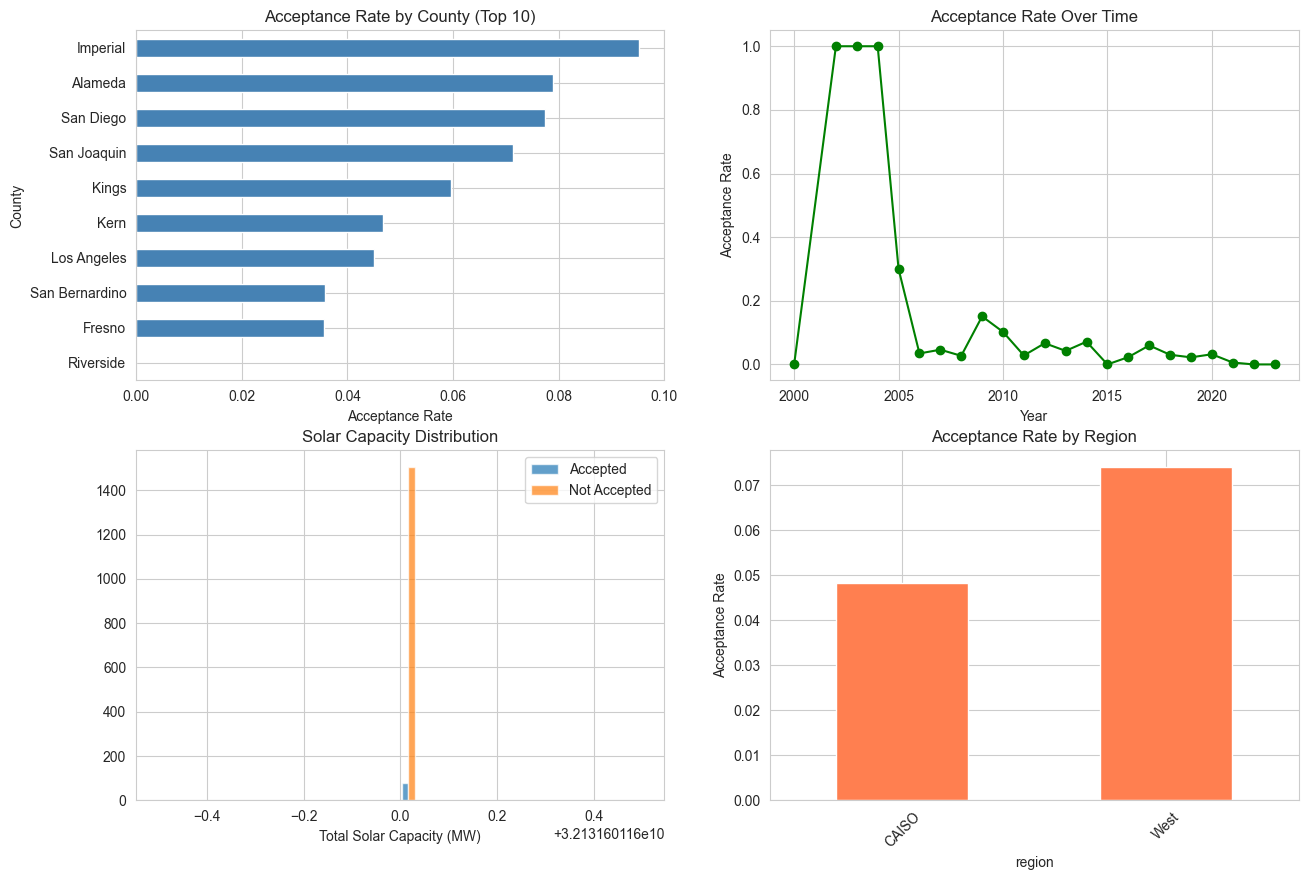

In [363]:
model_df = solar_df[solar_df['acceptance_status'].isin(['Accepted_Within_5Years', 'Not_Accepted'])].copy()
model_df['target'] = (model_df['acceptance_status'] == 'Accepted_Within_5Years').astype(int)

print(f"\nModeling dataset size: {len(model_df)}")
print(f"Acceptance rate: {model_df['target'].mean():.2%}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Acceptance by County
top_counties = model_df['County'].value_counts().head(10).index
county_acceptance = model_df[model_df['County'].isin(top_counties)].groupby('County')['target'].mean().sort_values()
county_acceptance.plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Acceptance Rate by County (Top 10)')
axes[0, 0].set_xlabel('Acceptance Rate')

# 2. Acceptance by Year
year_acceptance = model_df.groupby('q_year')['target'].agg(['mean', 'count'])
axes[0, 1].plot(year_acceptance.index, year_acceptance['mean'], marker='o', color='green')
axes[0, 1].set_title('Acceptance Rate Over Time')
axes[0, 1].set_ylabel('Acceptance Rate')
axes[0, 1].set_xlabel('Year')

#3
axes[1, 0].hist([model_df[model_df['target']==1]['total_solar_cap'].dropna(),
                 model_df[model_df['target']==0]['total_solar_cap'].dropna()],
                bins=30, label=['Accepted', 'Not Accepted'], alpha=0.7)
axes[1, 0].set_title('Solar Capacity Distribution')
axes[1, 0].set_xlabel('Total Solar Capacity (MW)')
axes[1, 0].legend()

# 4. Region Distribution
region_acceptance = model_df.groupby('region')['target'].agg(['mean', 'count'])
region_acceptance['mean'].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Acceptance Rate by Region')
axes[1, 1].set_ylabel('Acceptance Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

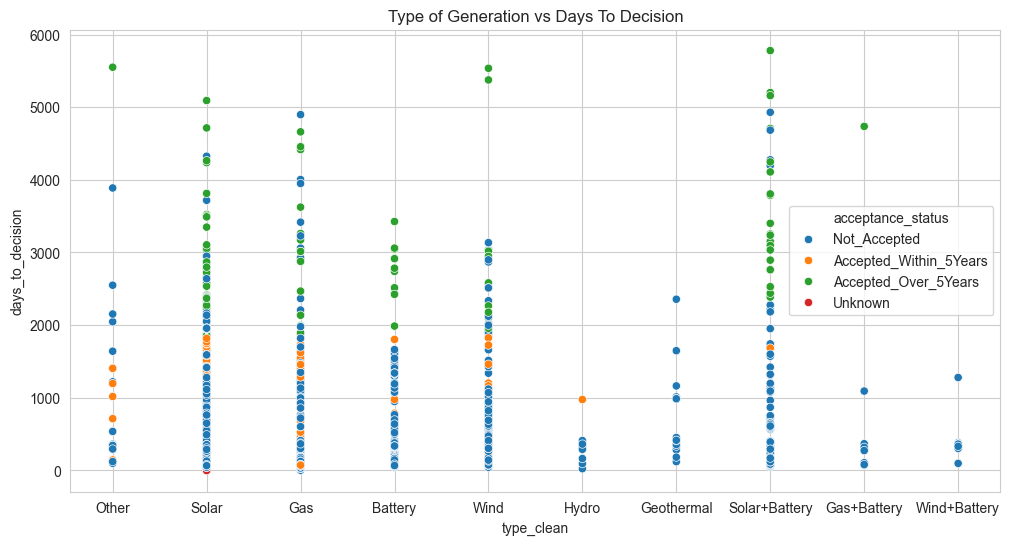

In [364]:
top_types = solar_df['type_clean'].value_counts().head(10).index.tolist()
df_top = solar_df[solar_df['type_clean'].isin(top_types)]
sns.scatterplot(
    data=df_top, 
    x='type_clean', 
    y='days_to_decision', 
    hue='acceptance_status'
)
plt.title("Type of Generation vs Days To Decision")
plt.show()


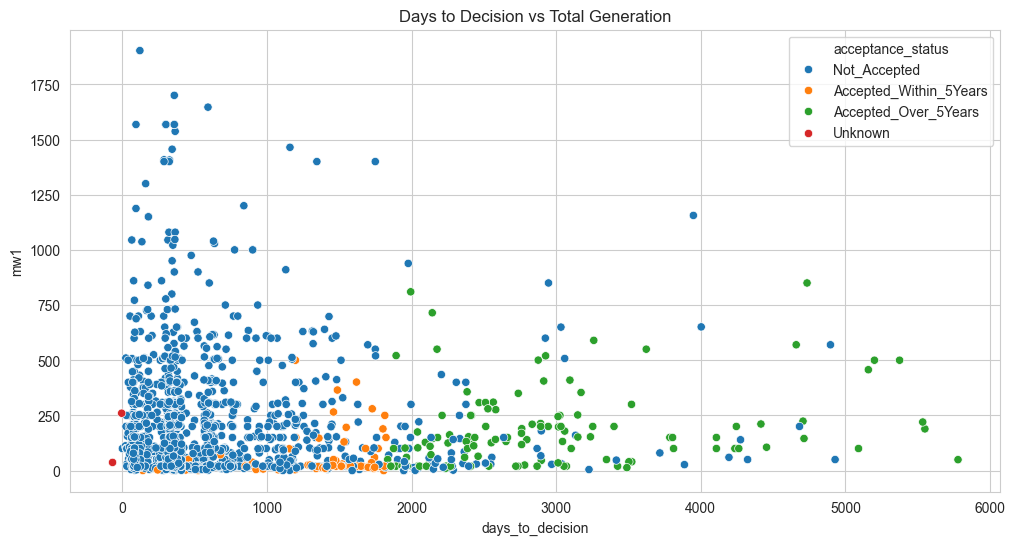

In [365]:
generation_req = solar_df[solar_df['project_type'] == "Generation"]
sns.scatterplot(
    data=generation_req, 
    x='days_to_decision', 
    y='mw1', 
    hue='acceptance_status'
)
plt.title("Days to Decision vs Total Generation")
plt.show()

# Model 

In [366]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression

In [367]:
solar_df.columns

Index(['q_status', 'q_date', 'prop_date', 'on_date', 'wd_date', 'County',
       'region', 'project_type', 'type1', 'mw1', 'type_clean', 'q_year',
       'prop_year', 'q_month', 'q_day', 'q_dayofweek', 'Biomass_MWh',
       'Geothermal_MWh', 'Small Hydro_MWh', 'Solar PV_MWh',
       'Solar Thermal_MWh', 'Wind_MWh', 'Total_MWh', 'Biomass_gen',
       'Geothermal_gen', 'Small Hydro_gen', 'Solar Photovoltaic_gen',
       'Solar Thermal_gen', 'Wind_gen', 'Total_gen (MWh)', 'days_to_decision',
       'acceptance_status', 'total_solar_cap', 'total_solar_gen',
       'load_utilization'],
      dtype='object')

In [370]:
solar_df["accepted_within_5yr"] = (
    solar_df["acceptance_status"] == "Accepted_Within_5Years"
).astype(int)


categorical_features = [
     "County", "region", "project_type",
    "type1", "type_clean"
]

numeric_features = [
    "mw1",
    "Biomass_MWh", "Geothermal_MWh", "Small Hydro_MWh",
    "Solar PV_MWh", "Solar Thermal_MWh", "Wind_MWh", "Total_MWh",
    "Biomass_gen", "Geothermal_gen", "Small Hydro_gen",
    "Solar Photovoltaic_gen", "Solar Thermal_gen", "Wind_gen",
    "Total_gen (MWh)",
    "total_solar_cap", "total_solar_gen", "load_utilization"
]

X = solar_df[categorical_features + numeric_features]
y = solar_df["accepted_within_5yr"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25
)

solar_df.dtypes


q_status                          object
q_date                    datetime64[ns]
prop_date                 datetime64[ns]
on_date                   datetime64[ns]
wd_date                   datetime64[ns]
County                            object
region                            object
project_type                      object
type1                             object
mw1                              float64
type_clean                        object
q_year                           float64
prop_year                        float64
q_month                            int32
q_day                              int32
q_dayofweek                        int32
Biomass_MWh                        int64
Geothermal_MWh                     int64
Small Hydro_MWh                    int64
Solar PV_MWh                       int64
Solar Thermal_MWh                  int64
Wind_MWh                           int64
Total_MWh                          int64
Biomass_gen                        Int64
Geothermal_gen  

In [371]:
#One Hot Encoding Step
#for categorical: fill NaN with "Missing" then one-hot encode
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# for numerical: fill NaN with column median
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, categorical_features),
        ("num", num_pipeline, numeric_features)
    ]
)

## Cross Validation

In [372]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define models and their hyperparameter grids
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=67),
        "params": {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [5, 10, None, 15, 3],
            "min_samples_split": [2, 5, 6, 9],
            "min_samples_leaf": [1, 2, 7, 4],
            "class_weight": ["balanced"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"),
        "params": {
            "C": [0.01, 0.1, 1, 10, 0.5, 3],
            "penalty": ["l1", "l2"]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=67),
        "params": {
            "n_estimators": [100, 200, 300, 400, 500],
            "learning_rate": [0.01, 0.05, 0.07, 0.08, 0.1],
            "max_depth": [3, 4, 5, 10, 7],
            "subsample": [0.8, 1.0, 0.5, 0.9]
        }
    },
    "SVM" : {
        "model": SVC(class_weight="balanced", probability=True),
        "params": {
            "C": [0.1, 1, 10, 50, 100],
            "kernel": ["linear", "rbf", "poly", "sigmoid"],
            "gamma": ["scale", "auto"],  # Only used for 'rbf', 'poly', 'sigmoid'
            "degree": [2, 3, 4]          # Only used for 'poly'
    }
    }
}

#OHE

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, categorical_features),
    ("num", num_pipeline, numeric_features)
])

#models

best_models = {}

for name, m in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("model", m["model"])
    ])
    
    grid = GridSearchCV(
        pipeline, 
        param_grid={"model__" + k: v for k, v in m["params"].items()},
        cv=5,                   # 5-fold CV
        scoring="roc_auc",      # optimize ROC AUC
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"Best ROC AUC for {name}: {grid.best_score_:.4f}")
    print(f"Best parameters: {grid.best_params_}\n")



Running GridSearchCV for RandomForest...


Python(4490) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4491) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4492) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4493) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4494) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4495) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4496) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(4497) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best ROC AUC for RandomForest: 0.7745
Best parameters: {'model__class_weight': 'balanced', 'model__max_depth': 15, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}

Running GridSearchCV for LogisticRegression...
Best ROC AUC for LogisticRegression: 0.8059
Best parameters: {'model__C': 1, 'model__penalty': 'l1'}

Running GridSearchCV for GradientBoosting...
Best ROC AUC for GradientBoosting: 0.8135
Best parameters: {'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__subsample': 0.5}

Running GridSearchCV for SVM...


KeyboardInterrupt: 

In [80]:
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.7).astype(int)  # your cutoff
    print(f"{name}")
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))
    print("\n")

## Gradient Boosting

In [143]:
solar_df.dtypes

q_status                          object
q_date                    datetime64[ns]
prop_date                 datetime64[ns]
on_date                   datetime64[ns]
wd_date                   datetime64[ns]
County                            object
region                            object
project_type                      object
type1                             object
mw1                              float64
type_clean                        object
q_year                           float64
prop_year                        float64
q_month                            int32
q_day                              int32
q_dayofweek                        int32
Biomass_GWh                      Float64
Geothermal_GWh                   Float64
Small Hydro_GWh                  Float64
Solar Photovoltaic_GWh           Float64
Solar Thermal_GWh                Float64
Wind_GWh                         Float64
Total_GWh                        Float64
Biomass_gen                      float64
Geothermal_gen  

In [144]:
#Model

model_gb = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=4,
    n_estimators=200,
    subsample=0.8
)

smote = SMOTE(k_neighbors=2, random_state=42)

pipeline_gb = imbpipeline(steps=[
    ("preprocess", preprocess),
    ("oversample", smote),     # oversampling ONLY on train split
    ("model", model_gb
    )
])


In [145]:
#Fitting & Results

pipeline_gb.fit(X_train, y_train)


y_prob_gb = pipeline_gb.predict_proba(X_test)[:, 1]


cutoff = 0.7
y_pred_gb = (y_prob_gb >= cutoff).astype(int)

results = X_test.copy()
results["actual"] = y_test.values
results["prob_accept_5yr"] = y_prob_gb
results["predicted"] = y_pred_gb

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_prob_gb))
print("\nClassification Report (cutoff = 0.7):")
print(classification_report(y_test, y_pred_gb))


NameError: name 'y_prob_gb' is not defined

In [84]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_gb)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


NameError: name 'y_prob_gb' is not defined

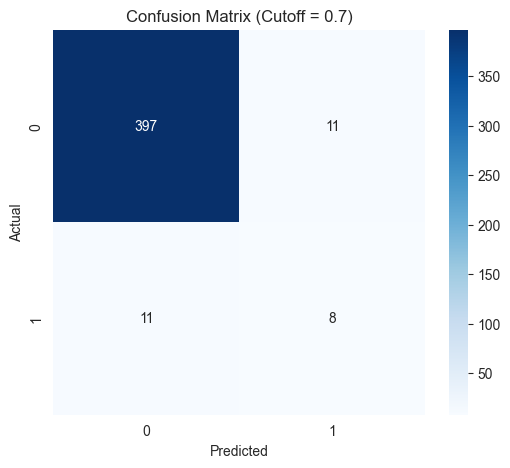

In [214]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


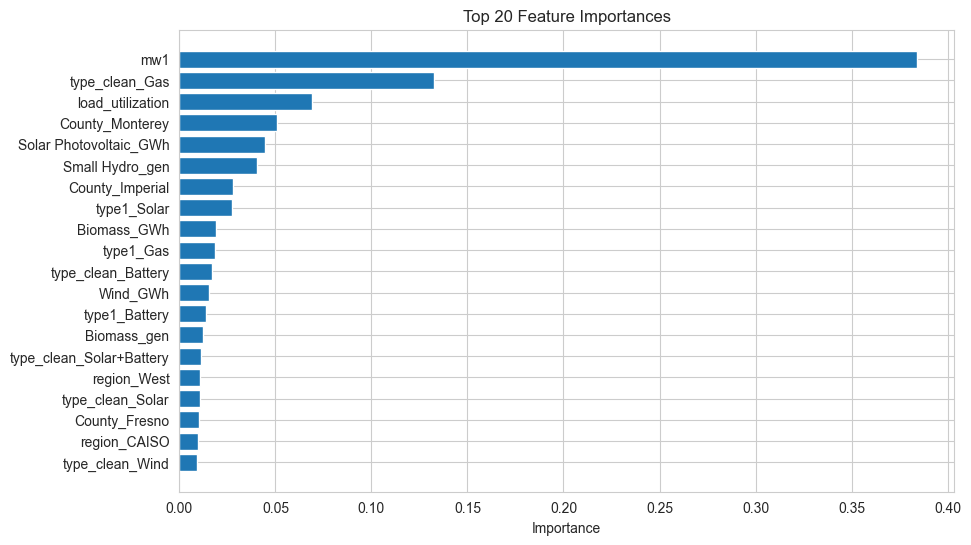

In [215]:
# Get feature names after one-hot encoding
cat_features = pipeline_gb.named_steps["preprocess"].named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
num_features = numeric_features
all_features = np.concatenate([cat_features, num_features])

# Get model importances
importances = pipeline_gb.named_steps["model"].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
top_n = 20  # plot top 20
plt.figure(figsize=(10,6))
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), all_features[indices][:top_n])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    class_weight="balanced",  
    random_state=42,
    n_jobs=-1
)

pipeline_rf = imbpipeline(steps=[
    ("preprocess", preprocess),    
    ("model", rf_model)
])

# Train
pipeline_rf.fit(X_train, y_train)

# Predict probabilities
rf_prob = pipeline_rf.predict_proba(X_test)[:, 1]

# Apply 0.7 cutoff
rf_pred = (rf_prob >= 0.7).astype(int)

# Evaluate
print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_prob))
print("\nRandom Forest Classification Report (cutoff = 0.7):")
print(classification_report(y_test, rf_pred))


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [96]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, rf_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

NameError: name 'rf_prob' is not defined

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'rf_pred' is not defined

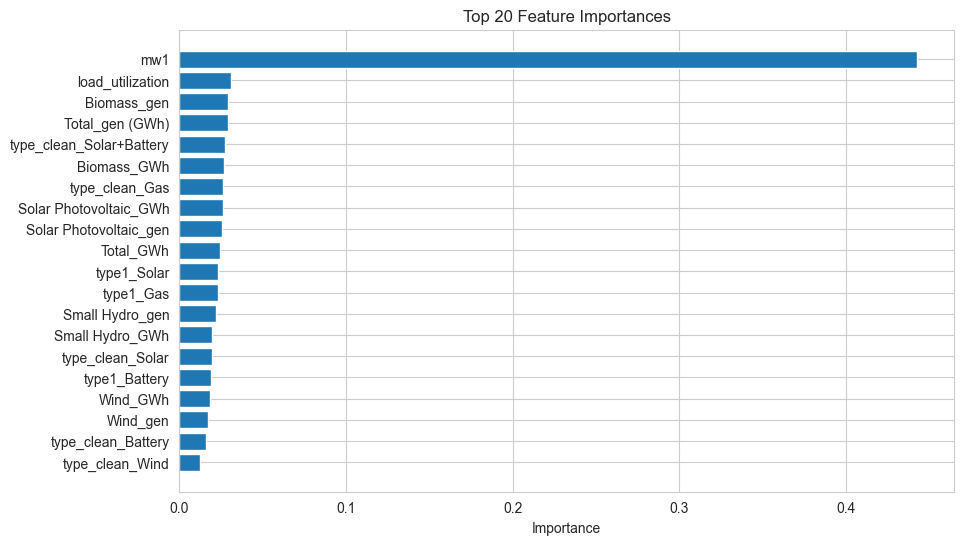

In [222]:
# Get feature names after one-hot encoding
cat_features = pipeline_rf.named_steps["preprocess"].named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
num_features = numeric_features
all_features = np.concatenate([cat_features, num_features])

# Get model importances
importances = pipeline_rf.named_steps["model"].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
top_n = 20  # plot top 20
plt.figure(figsize=(10,6))
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), all_features[indices][:top_n])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


## Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(
    class_weight="balanced",   
    max_iter=500,
    solver="liblinear"         
)

pipeline_log = imbpipeline(steps=[
    ("preprocess", preprocess),
    ("model", log_model)
])

pipeline_log.fit(X_train, y_train)

log_prob = pipeline_log.predict_proba(X_test)[:, 1]

log_pred = (log_prob >= 0.7).astype(int)

print("Logistic Regression ROC AUC:", roc_auc_score(y_test, log_prob))
print("\nLogistic Regression Classification Report (cutoff = 0.7):")
print(classification_report(y_test, log_pred))


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [107]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, log_pred)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

NameError: name 'log_pred' is not defined

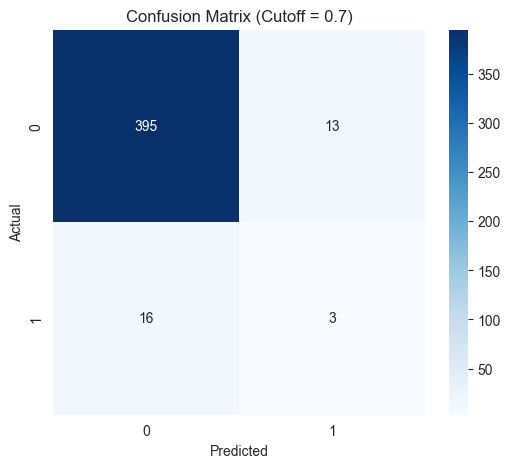

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## SVM

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.pipeline import Pipeline as imbpipeline

svm_model = SVC(
    C=1.0,               
    kernel='rbf',         
    class_weight='balanced',
    probability=True,    
)

pipeline_svm = imbpipeline(steps=[
    ("preprocess", preprocess),    
    ("model", svm_model)
])

pipeline_svm.fit(X_train, y_train)

svm_prob = pipeline_svm.predict_proba(X_test)[:, 1]

svm_pred = (svm_prob >= 0.5).astype(int)

print("SVM ROC AUC:", roc_auc_score(y_test, svm_prob))
print("\nSVM Classification Report (cutoff = 0.5):")
print(classification_report(y_test, svm_pred))

SVM ROC AUC: 0.514641382868937

SVM Classification Report (cutoff = 0.5):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       408
           1       0.00      0.00      0.00        19

    accuracy                           0.96       427
   macro avg       0.48      0.50      0.49       427
weighted avg       0.91      0.96      0.93       427



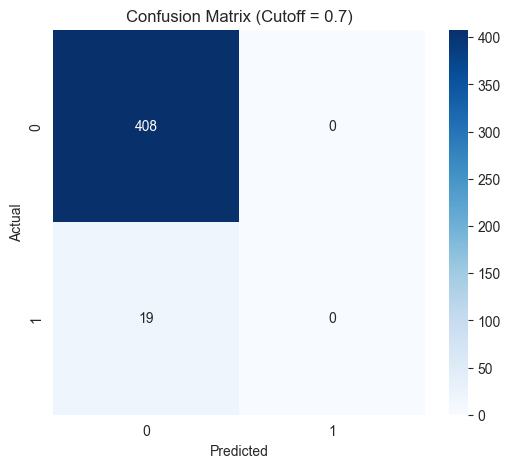

In [41]:

cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
